In [5]:
!pip3 install matplotlib numpy
import matplotlib.pyplot as plt
import numpy as np

In [36]:
OM_t = lambda t: 75 * np.pi * (0.1 * t + 0.3 * t**2)
dOM_t = lambda t: 75 * np.pi * (0.1 + 0.6 * t)
ddOM_t = lambda t: 75 * np.pi * 0.6
# OM_t = lambda t: 75 * np.pi * (0.1 * t + 0.3 * t**3)
# dOM_t = lambda t: 75 * np.pi * (0.1 + 0.9 * t**2)
# ddOM_t = lambda t: 75 * np.pi * 1.8 * t
phi_t = lambda t: 2 * t - 0.3 * t**2
dphi_t = lambda t: 2 - 0.6 * t
ddphi_t = lambda t: -0.6
R = 30


In [7]:
# we can find when M will reach point O the second time https://www.wolframalpha.com/input?i=0.3x%5E2+%2B+0.1x+-+60%2F75+%3D+0
# t = 1.47481

t_last = 1.47481
t = np.linspace(0, t_last, 100)

In [47]:
from dataclasses import dataclass


@dataclass
class State:
    t: float

    @property
    def theta(self):
        # angle of point M with respect to disk D
        return OM_t(self.t) / R

    @property
    def dtheta(self):
        return dOM_t(self.t) / R

    @property
    def ddtheta(self):
        return ddOM_t(self.t) / R

    @property
    def pos_o1(self):
        return np.array([0, 0, 0])

    @property
    def pos_o(self):
        return (
            np.sqrt(2)
            * R
            * np.array(
                [
                    np.cos(phi_t(self.t) + np.pi / 4),
                    np.sin(phi_t(self.t) + np.pi / 4),
                    0,
                ]
            )
        )

    @property
    def pos_d(self):
        return R * np.array(
            [
                np.cos(phi_t(self.t) + np.pi / 2),
                np.sin(phi_t(self.t) + np.pi / 2),
                0,
            ]
        )

    @property
    def pos_m(self):
        return self.pos_d + R * np.array(
            [
                np.cos(self.theta + phi_t(self.t)),
                np.sin(self.theta + phi_t(self.t)),
                0,
            ]
        )

    @property
    def vel_m_rel(self):
        return np.cross(
            np.array([0, 0, self.dtheta]),
            self.pos_m - self.pos_d,
        )

    @property
    def vel_m_tr(self):
        return np.cross(
            np.array([0, 0, dphi_t(self.t)]),
            self.pos_m,
        )

    @property
    def vel_m(self):
        return self.vel_m_rel + self.vel_m_tr

    @property
    def acc_m_tr_tan(self):
        return np.cross(
            np.array([0, 0, ddphi_t(self.t)]),
            self.pos_m,
        )

    @property
    def acc_m_tr_norm(self):
        return np.cross(
            np.array([0, 0, dphi_t(self.t)]),
            np.cross(
                np.array([0, 0, dphi_t(self.t)]),
                self.pos_m,
            ),
        )

    @property
    def acc_m_tr(self):
        return self.acc_m_tr_norm + self.acc_m_tr_tan

    @property
    def acc_m_rel_tan(self):
        return np.cross(
            np.array([0, 0, self.ddtheta]),
            self.pos_m - self.pos_d,
        )

    @property
    def acc_m_rel_norm(self):
        return np.cross(
            np.array([0, 0, self.dtheta]),
            np.cross(
                np.array([0, 0, self.dtheta]),
                self.pos_m - self.pos_d,
            ),
        )

    @property
    def acc_m_rel(self):
        return self.acc_m_rel_norm + self.acc_m_rel_tan

    @property
    def acc_m_cor(self):
        return 2 * np.cross(np.array([0, 0, dphi_t(self.t)]), self.vel_m_rel)

    @property
    def acc_m(self):
        return self.acc_m_rel + self.acc_m_cor + self.acc_m_tr

    def display(self, actors):
        actors["o1"].center = self.pos_o1[:2]
        actors["o"].center = self.pos_o[:2]
        actors["d"].center = self.pos_d[:2]
        actors["m"].center = self.pos_m[:2]
        actors["dcenter"].center = self.pos_d[:2]

    def display_vel(self, actors):
        self.display(actors)
        actors["m_vel"].set_data(
            x=self.pos_m[0], y=self.pos_m[1], dx=self.vel_m[0], dy=self.vel_m[1]
        )
        actors["m_vel_rel"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.vel_m_rel[0],
            dy=self.vel_m_rel[1],
        )
        actors["m_vel_tr"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.vel_m_tr[0],
            dy=self.vel_m_tr[1],
        )

    def display_acc(self, actors):
        self.display(actors)
        actors["m_acc"].set_data(
            x=self.pos_m[0], y=self.pos_m[1], dx=self.acc_m[0], dy=self.acc_m[1]
        )
        actors["m_acc_rel"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.acc_m_rel[0],
            dy=self.acc_m_rel[1],
        )
        actors["m_acc_cor"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.acc_m_cor[0],
            dy=self.acc_m_cor[1],
        )
        actors["m_acc_tr"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.acc_m_tr[0],
            dy=self.acc_m_tr[1],
        )


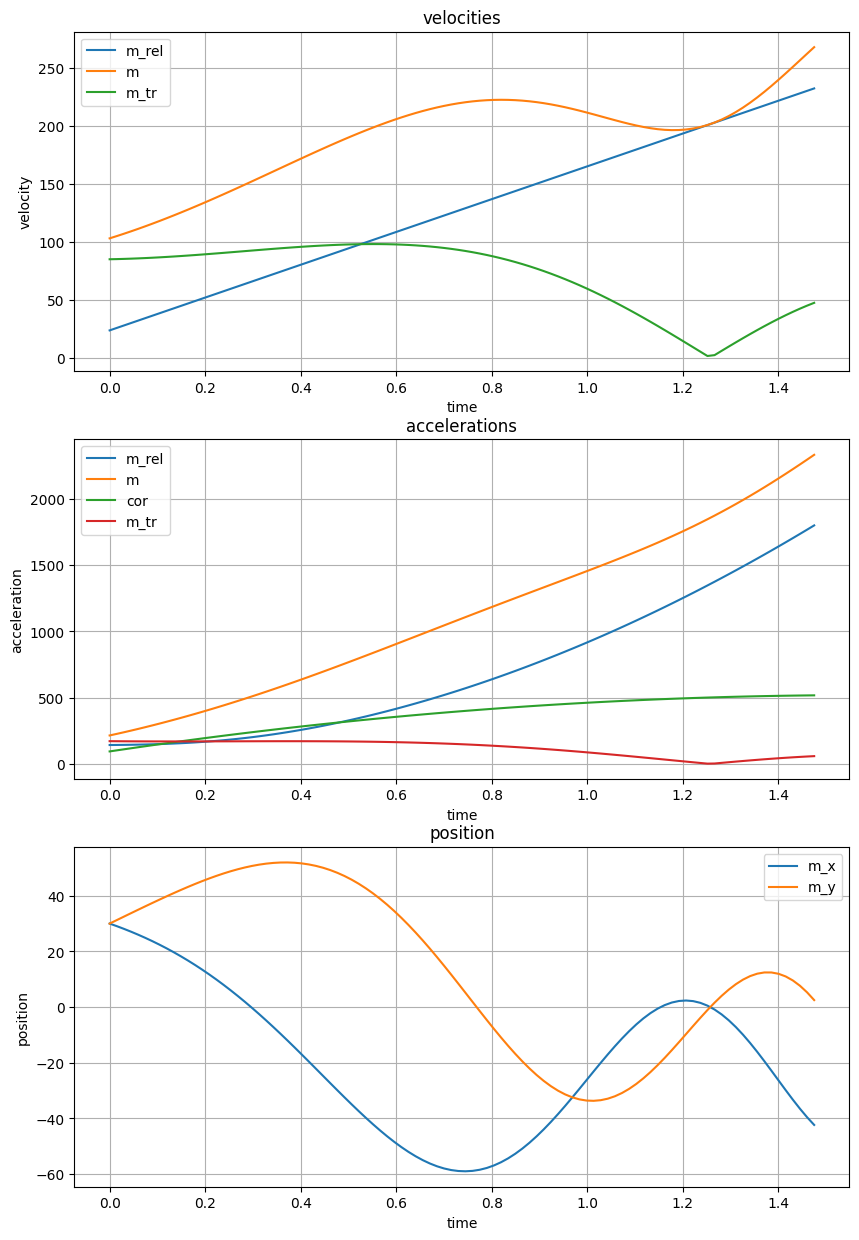

In [48]:
# show plots for velocities and accelerations

states = [State(t) for t in t]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# plot velocities
axes[0].set_title("velocities")
axes[0].set_xlabel("time")
axes[0].set_ylabel("velocity")
axes[0].plot(t, [np.linalg.norm(state.vel_m_rel) for state in states], label="m_rel")
axes[0].plot(t, [np.linalg.norm(state.vel_m) for state in states], label="m")
axes[0].plot(t, [np.linalg.norm(state.vel_m_tr) for state in states], label="m_tr")

# plot accelerations
axes[1].set_title("accelerations")
axes[1].set_xlabel("time")
axes[1].set_ylabel("acceleration")
axes[1].plot(t, [np.linalg.norm(state.acc_m_rel) for state in states], label="m_rel")
axes[1].plot(t, [np.linalg.norm(state.acc_m) for state in states], label="m")
axes[1].plot(t, [np.linalg.norm(state.acc_m_cor) for state in states], label="cor")
axes[1].plot(t, [np.linalg.norm(state.acc_m_tr) for state in states], label="m_tr")

# plot positions
axes[2].set_title("position")
axes[2].set_xlabel("time")
axes[2].set_ylabel("position")
axes[2].plot(t, [state.pos_m[0] for state in states], label="m_x")
axes[2].plot(t, [state.pos_m[1] for state in states], label="m_y")

for ax in axes:
    ax.legend()
    ax.grid()

plt.show()


0
0
10
20
30
40
50
60
70
80
90
100
110
120
0


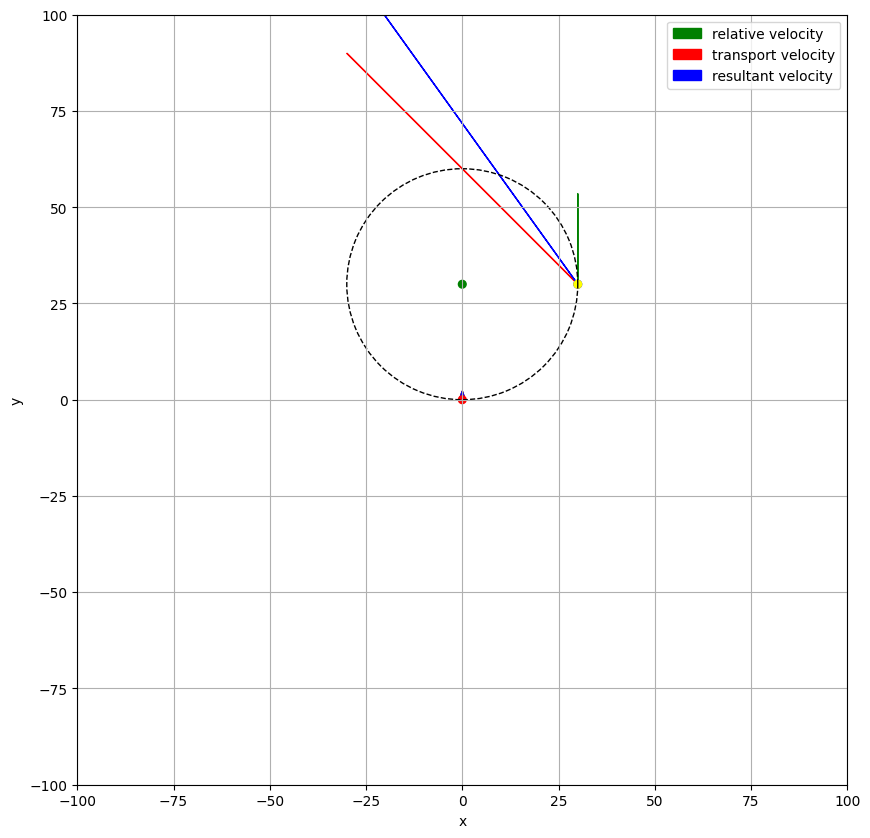

In [49]:
# create animation for t from 0 to t_last

from cProfile import label
import matplotlib.patches as p

states_anim = [State(t) for t in t]
states_anim.extend([states_anim[-1]] * 30)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_aspect("equal")
ax.grid()

actors = {
    "o1": p.Circle(states_anim[0].pos_o1, 1, color="red"),
    "o": p.Circle(states_anim[0].pos_o, 1, color="blue"),
    "m": p.Circle(states_anim[0].pos_m, 1, color="yellow"),
    "dcenter": p.Circle(states_anim[0].pos_d, 1, color="green"),
    "d": p.Arc(
        states_anim[0].pos_d[:2], 2 * R, 2 * R, 0, 0, 360, color="black", linestyle="--"
    ),
    "m_vel_rel": ax.arrow(0, 0, 0, 0, color="green", label="relative velocity"),
    "m_vel_tr": ax.arrow(0, 0, 0, 0, color="red", label="transport velocity"),
    "m_vel": ax.arrow(0, 0, 0, 0, color="blue", label="resultant velocity"),
}
ax.add_patch(actors["o1"])
ax.add_patch(actors["o"])
ax.add_patch(actors["m"])
ax.add_patch(actors["d"])
ax.add_patch(actors["dcenter"])
ax.legend()


def animate(i):
    if i % 10 == 0:
        print(i)
    state = states_anim[i]
    state.display_vel(actors)


from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, animate, frames=len(states_anim), interval=1)
anim.save("task2_vel.gif")
plt.draw()
plt.show()


0
0
10
20
30
40
50
60
70
80
90
100
110
120
0


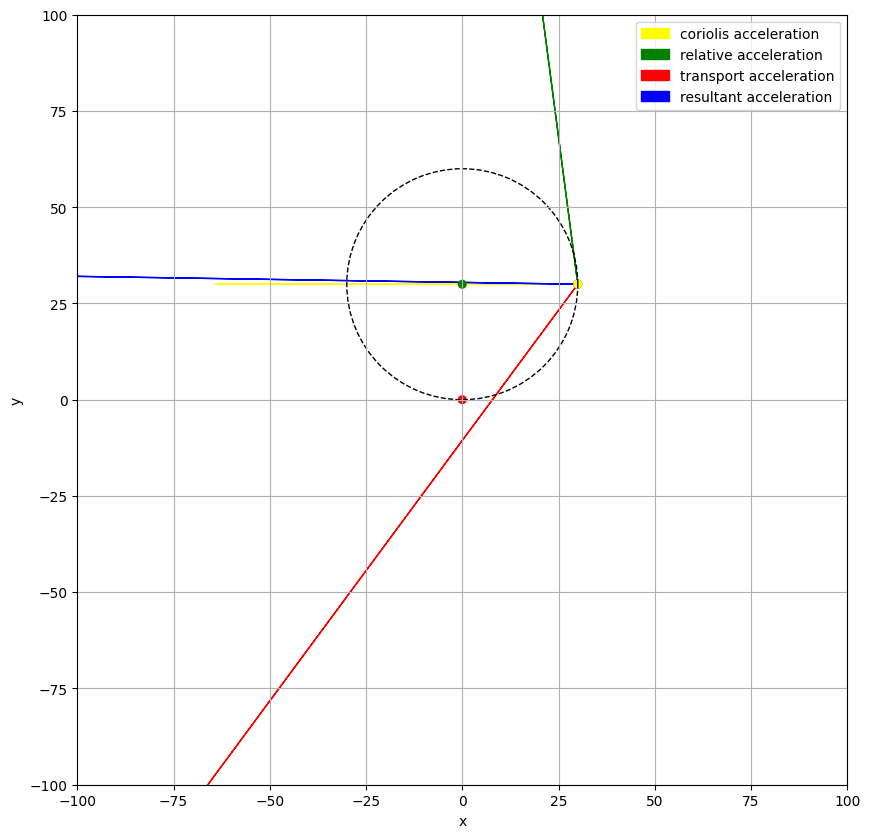

In [51]:
# create animation for t from 0 to t_last

import matplotlib.patches as p

states_anim = [State(t) for t in t]
states_anim.extend([states_anim[-1]] * 30)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_aspect("equal")
ax.grid()

actors = {
    "o1": p.Circle(states_anim[0].pos_o1, 1, color="red"),
    "o": p.Circle(states_anim[0].pos_o, 1, color="blue"),
    "m": p.Circle(states_anim[0].pos_m, 1, color="yellow"),
    "dcenter": p.Circle(states_anim[0].pos_d, 1, color="green"),
    "d": p.Arc(
        states_anim[0].pos_d[:2], 2 * R, 2 * R, 0, 0, 360, color="black", linestyle="--"
    ),
    "m_acc_cor": ax.arrow(0, 0, 0, 0, color="yellow", label="coriolis acceleration"),
    "m_acc_rel": ax.arrow(0, 0, 0, 0, color="green", label="relative acceleration"),
    "m_acc_tr": ax.arrow(0, 0, 0, 0, color="red", label="transport acceleration"),
    "m_acc": ax.arrow(0, 0, 0, 0, color="blue", label="resultant acceleration"),
}
ax.add_patch(actors["o1"])
ax.add_patch(actors["o"])
ax.add_patch(actors["m"])
ax.add_patch(actors["d"])
ax.add_patch(actors["dcenter"])
ax.legend()


def animate(i):
    if i % 10 == 0:
        print(i)
    state = states_anim[i]
    state.display_acc(actors)


from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, animate, frames=len(states_anim), interval=1)
anim.save("task2_acc.gif")
plt.draw()
plt.show()
